**Install and Import Dependenies**

In [ ]:
!pip install matplotlib tensorflow tensorflow-io tensorflow-gpu 

Tensorflow-io is install for audio processing

In [4]:
from matplotlib import pyplot as plt
import tensorflow_io as tfio
import os
import tensorflow as tf 

How paths are defined
<br>CB -> Cappuchin Bird
<br>NCB -> Non Cappuchin Bird
<br> Change the file path according to user need.

In [35]:
positive_label_path = '/content/Data/PCB'
negative_label_path = '/content/Data/PNCB'

In [36]:
File_CB = os.path.join(positive_label_path, 'XC114131-1.wav')
File_NCB = os.path.join(negative_label_path,'Crickets-chirping-0.wav')

Processing Audio to convert it into 16hz single-channel

In [15]:
def wave_processing(filepath):
  content = tf.io.read_file(filepath)
  wave, sr = tf.audio.decode_wav(content, desired_channels=1)
  wave = tf.squeeze(wave, axis=-1)
  sr = tf.cast(sr, dtype=tf.int64)
  wave = tfio.audio.resample(wave, rate_in=sr, rate_out=16000)
  return wave

Sample waves from dataset provided

In [37]:
sample1 = wave_processing(File_CB)
sample2 = wave_processing(File_NCB)

In [38]:
print(sample1)

tf.Tensor(
[-2.38103937e-08 -1.19024826e-08 -6.48144649e-08 ... -5.84699772e-03
  6.84118923e-03 -6.73171133e-03], shape=(48000,), dtype=float32)


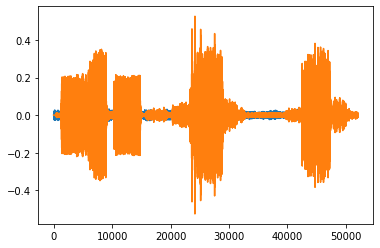

In [18]:
plt.figure(1)
plt.plot(sample1)
plt.plot(sample2)
plt.show()

**Make Sound dataset**<br>
We will define filepaths for positive and negative data

In [28]:
positive_files = tf.data.Dataset.list_files(positive_label_path+'/*.wav')
negative_files = tf.data.Dataset.list_files(negative_label_path+'/*.wav')

In [29]:
positive_files.as_numpy_iterator().next()

b'/content/Data/PCB/XC216012-11.wav'

Provide positive and negative labels for all the dataset files and combine the samples

In [32]:
positive_label = tf.data.Dataset.zip((positive_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(positive_files)))))
negative_label = tf.data.Dataset.zip((negative_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(negative_files)))))
dataset = positive_label.concatenate(negative_label)

In [34]:
len(dataset)

810

Calculate how long is the average Capuchin bird call

In [39]:
call_length = []
for ele in os.listdir(positive_label_path):
  wave = wave_processing(os.path.join(positive_label_path, ele))
  call_length.append(len(wave))

In [41]:
len(call_length)

217

Determine Max, Min, and Mean length of call

In [45]:
print('Max Length: ', tf.math.reduce_max(call_length))
print('Min Length: ', tf.math.reduce_min(call_length))
print('Mean Length: ', tf.math.reduce_mean(call_length))

Max Length:  tf.Tensor(80000, shape=(), dtype=int32)
Min Length:  tf.Tensor(32000, shape=(), dtype=int32)
Mean Length:  tf.Tensor(54156, shape=(), dtype=int32)
